In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as path_effects
import matplotlib.ticker as mticker

In [13]:
# Load the CSV into a DataFrame
file_path = "/home/betty/Desktop/Becode_training_path/Projects/Data_analysis/csv-data/cleaned_dataset_analysis.csv" 
df = pd.read_csv(file_path)

Use the IQR to identify outliers as points lying beyond 1.5×IQR

In [14]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
print(df["Price"].describe()) # Description of the dataframe

count      10574.00
mean      743107.26
std       847654.63
min        27500.00
25%       279000.00
50%       519950.00
75%       850000.00
max     10500000.00
Name: Price, dtype: float64


In [15]:
#Calculate quartiles and IQR
Q1 = df['Price'].quantile(0.25)  # (25%)
Q3 = df['Price'].quantile(0.75)  # (75%)
IQR = Q3 - Q1  

# Calculate limits for outliers
limit_inferior = Q1 - 1.5 * IQR
limit_superior = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < limit_inferior) | (df['Price'] > limit_superior)]
print(f"Limit inferior: {limit_inferior}")
print(f"Limit superior: {limit_superior}")
print("\nOutliers:")
print(len(outliers))
print(outliers)


Limit inferior: -577500.0
Limit superior: 1706500.0

Outliers:
800
                  Locality  Zip Code Type of Property   Subtype of Property  \
4                Kalmthout      2920            House           manor-house   
11                   Uccle      1180            House                 villa   
12               Bruxelles      1000            House    mixed-use-building   
20           Sint-idesbald      8670            House                 villa   
24                   Uccle      1180            House                 house   
...                    ...       ...              ...                   ...   
10540              Belsele      9111            House                 villa   
10559              Ixelles      1050            House               mansion   
10561                Lasne      1380            House                 villa   
10566  Woluwe-saint-pierre      1150            House                 villa   
10567             Sprimont      4140            House  exception

In [16]:
# Expanding the interquartile range
Q1 = df['Price'].quantile(0.10)  #  (10%)
Q3 = df['Price'].quantile(0.90)  #  (90%)
IQR = Q3 - Q1 

# Calculate limits for outliers
limit_inferior = Q1 - 1.5 * IQR
limit_superior = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < limit_inferior) | (df['Price'] > limit_superior)]
print(f"Limit inferior: {limit_inferior}")
print(f"Limit superior: {limit_superior}")
print("\nOutliers:")
print(len(outliers))
print(outliers)



Limit inferior: -1745000.0
Limit superior: 3439000.0

Outliers:
231
                  Locality  Zip Code Type of Property   Subtype of Property  \
4                Kalmthout      2920            House           manor-house   
12               Bruxelles      1000            House    mixed-use-building   
37            Knokke-heist      8300        Apartment             apartment   
44            Knokke-heist      8300            House  exceptional-property   
48      Sint-martens-latem      9831            House       country-cottage   
...                    ...       ...              ...                   ...   
9883             Bruxelles      1000            House       apartment-block   
10163         Knokke-zoute      8300            House                 villa   
10338  Knokke-heist-knokke      8300            House                 villa   
10485                 Lier      2500            House                 villa   
10567             Sprimont      4140            House  exceptio

In [17]:
# Describing the outliers subset
print(outliers['Price'].describe())


count        231.00
mean     4953367.10
std      1391010.76
min      3475000.00
25%      3950000.00
50%      4500000.00
75%      5695000.00
max     10500000.00
Name: Price, dtype: float64


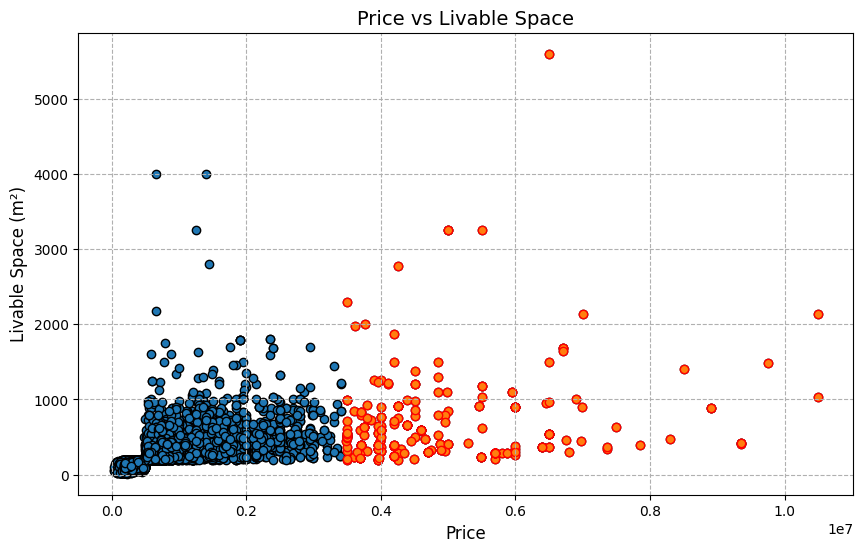

In [18]:
# Plotting outliers (orange dots)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Livable Space (m2)'], edgecolor='k')
plt.scatter(outliers['Price'], outliers['Livable Space (m2)'], edgecolor='r')

plt.title('Price vs Livable Space', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Livable Space (m²)', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

In [19]:
# Group by 'Subtype of Property' and calculate averages and counts
grouped = df.groupby('Subtype of Property').agg(
    avg_price=('Price', 'mean'),  # Calculate the average price
    avg_space=('Livable Space (m2)', 'mean'),  # Calculate the average livable space
    count=('Price', 'size')  # Count the number of elements
).reset_index()

# Calculate the ratio of Price / Livable Space
grouped['price_per_m2'] = grouped['avg_price'] / grouped['avg_space']

# Sort by price_per_m2 in descending order (from highest to lowest)
grouped_sorted = grouped.sort_values(by='price_per_m2', ascending=False)

# View the results
print(grouped_sorted)


     Subtype of Property  avg_price  avg_space  count  price_per_m2
12                   kot  265033.33      51.28     18       5168.58
18             penthouse 1034645.94     207.22    167       4992.95
9            flat-studio  185439.46      38.45    114       4823.20
6                 duplex  693548.82     158.82    177       4366.75
10          ground-floor  444817.29     119.99    150       3707.02
22                 villa 1371201.79     372.75   1367       3678.56
14           manor-house 1386136.36     377.59     22       3671.00
13                  loft  920442.02     252.87     46       3639.99
19          service-flat  250933.33      69.47     30       3612.28
0              apartment  409474.14     113.79   2548       3598.66
21               triplex  602378.85     178.85     26       3368.14
7   exceptional-property 1470683.66     526.28    361       2794.48
15               mansion 1261632.29     466.16    219       2706.41
11                 house  642543.32     239.49  

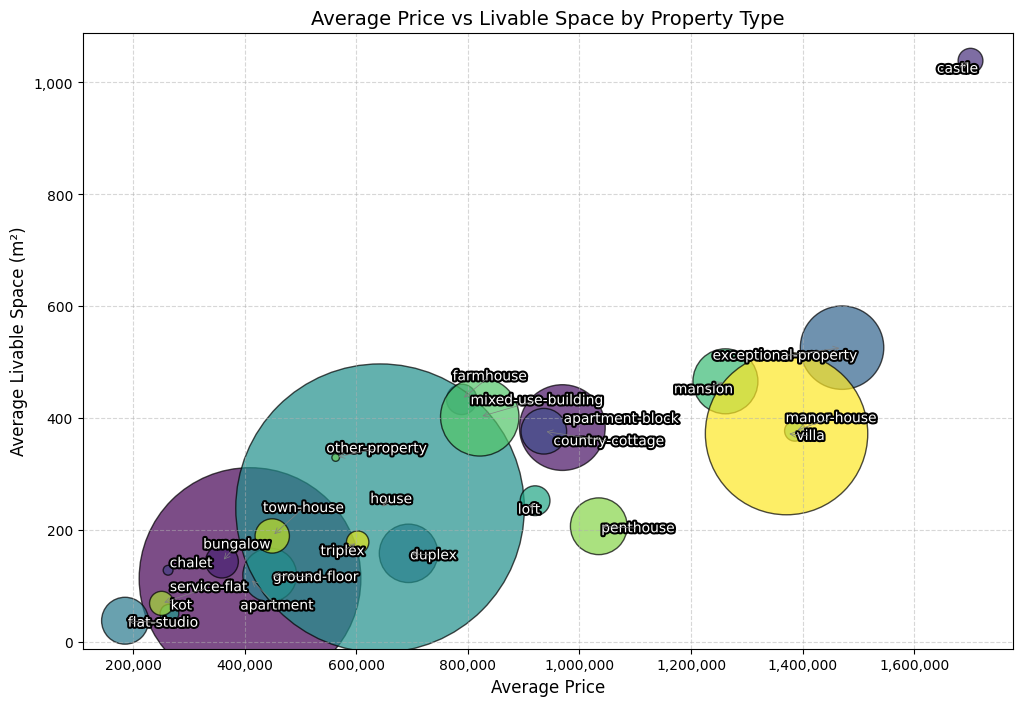

In [21]:
plt.figure(figsize=(12, 8))

# Scatter plot where the size (s) is proportional to the count
plt.scatter(
    grouped['avg_price'], 
    grouped['avg_space'], 
    s=grouped['count'] * 10,  # Scale the size (adjustable)
    alpha=0.7, 
    edgecolor='k', 
    c=range(len(grouped)), cmap='viridis'  # Color by category
)

# Create a list of text elements to adjust
texts = []
for i, row in grouped.iterrows():
    txt = plt.text(
        row['avg_price'], 
        row['avg_space'], 
        row['Subtype of Property'], 
        fontsize=10,
        color='w',  # Text color
        ha='center', 
        va='center'
    )
    # Add effects to the text
    txt.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),  # Black outline
        path_effects.Normal()  # Normal text on top
    ])
    texts.append(txt)  # Add the text to the list

# Adjust the label positions to avoid overlaps
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),  # Optional: arrows for moved labels
    only_move={'points': 'y', 'text': 'y'},  # Move labels vertically only (adjustable)
    force_text=1.2,  # Extra force to avoid overlaps
    force_points=0.8  # Separation force between points
)

# Configure axes without scientific notation
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas and no decimals
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

# Configure the plot
plt.title('Average Price vs Livable Space by Property Type', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Average Livable Space (m²)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
